In [183]:
import pandas as pd
import numpy as np
import math
import pandas as pd
from scipy.stats import *
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report,roc_auc_score, roc_curve, auc, log_loss
import plotly.graph_objects as go
import warnings
from imblearn.over_sampling import SMOTE
warnings.filterwarnings("ignore")

<h1><center><font size=8>PART A</center></font></h1>

### **Context:**
Medical
### **Objective:**
Medical research university X is undergoing a deep research on patients with certain conditions. University has an internal AI team. 
Due to confidentiality the patient’s details and the conditions are masked by the client by providing different datasets to the AI team for 
developing a AIML model which can predict the condition of the patient depending on the received test results.

### **Data Description:**
The data consists of biomechanics features of the patients according to their current conditions. Each patient is 
represented in the data set by six biomechanics attributes derived from the shape and orientation of the condition to their body part.

### **Project Objective**
To Demonstrate the ability to fetch, process and leverage data to generate useful predictions by training Supervised 
Learning algorithms

#### Data Understanding:

In [184]:
# reading the dataframes

df1 = pd.read_csv("Normal.csv")
df2 = pd.read_csv("Type_H.csv")
df3 = pd.read_csv("Type_S.csv")

In [185]:
#shapes of data frames

print("The shape of data frame 1: ",df1.shape)
print("The shape of data frame 2: ",df2.shape)
print("The shape of data frame 3: ",df3.shape)

The shape of data frame 1:  (100, 7)
The shape of data frame 2:  (60, 7)
The shape of data frame 3:  (150, 7)


In [186]:
# displaying the columns of dataframe 1

df1.columns

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

In [187]:
# displaying the columns of dataframe 2

df2.columns

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

In [188]:
# displaying the columns of dataframe 3

df3.columns

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

- *The 3 datasets have 7 columns each and all columns have same name*

In [189]:
# displaying the data types of dataframe 1

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  100 non-null    float64
 1   P_tilt       100 non-null    float64
 2   L_angle      100 non-null    float64
 3   S_slope      100 non-null    float64
 4   P_radius     100 non-null    float64
 5   S_Degree     100 non-null    float64
 6   Class        100 non-null    object 
dtypes: float64(6), object(1)
memory usage: 5.6+ KB


In [190]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  60 non-null     float64
 1   P_tilt       60 non-null     float64
 2   L_angle      60 non-null     float64
 3   S_slope      60 non-null     float64
 4   P_radius     60 non-null     float64
 5   S_Degree     60 non-null     float64
 6   Class        60 non-null     object 
dtypes: float64(6), object(1)
memory usage: 3.4+ KB


In [191]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  150 non-null    float64
 1   P_tilt       150 non-null    float64
 2   L_angle      150 non-null    float64
 3   S_slope      150 non-null    float64
 4   P_radius     150 non-null    float64
 5   S_Degree     150 non-null    float64
 6   Class        150 non-null    object 
dtypes: float64(6), object(1)
memory usage: 8.3+ KB


In [192]:
print("Variation in 'Class' feature of dataFrame 1:")
print(df1['Class'].value_counts())

print("\nVariation in 'Class' feature of dataFrame 2:")
print(df2['Class'].value_counts())

print("\nVariation in 'Class' feature of dataFrame 3:")
print(df3['Class'].value_counts())

Variation in 'Class' feature of dataFrame 1:
Class
Normal    73
Nrmal     27
Name: count, dtype: int64

Variation in 'Class' feature of dataFrame 2:
Class
Type_H    37
type_h    23
Name: count, dtype: int64

Variation in 'Class' feature of dataFrame 3:
Class
Type_S    133
tp_s       17
Name: count, dtype: int64


#### Data Preparation and Exploration:

In [193]:
# converting all values of column 'Class' in dataframe1 from "Normal" and "Nrmal" to "normal"

df1['Class'] = 'normal'   
df1['Class'].value_counts()

Class
normal    100
Name: count, dtype: int64

In [194]:
# converting all values of column 'Class' in dataframe2 from "Type_H" and "type_h" to "type_h"

df2['Class'] = 'type_h'   
df2['Class'].value_counts()

Class
type_h    60
Name: count, dtype: int64

In [195]:
# converting all values of column 'Class' in dataframe2 from "Type_S" and "tp_s" to "type_s"

df3['Class'] = 'type_s'   
df3['Class'].value_counts()

Class
type_s    150
Name: count, dtype: int64

In [196]:
# combining the dataframes to single dataframe
df = pd.concat([df1, df2, df3], ignore_index=True)

print("Shape of combined DataFrame:", df.shape)

Shape of combined DataFrame: (310, 7)


In [197]:
# displaying 5 random samples of this dataframe

df.sample(n=5)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
218,65.536003,24.157487,45.775170,41.378515,136.440302,16.378086,type_s
149,41.767732,17.899402,20.030886,23.868330,118.363389,2.062963,type_h
267,72.343594,16.420790,59.869012,55.922805,70.082575,12.072644,type_s
259,64.274818,12.508643,68.702377,51.766175,95.252454,39.409826,type_s
308,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,type_s


In [198]:
null_percent = (df.isnull().sum() / len(df)) * 100

print("Feature-wise percentage of Null values:")
print(null_percent)

Feature-wise percentage of Null values:
P_incidence    0.0
P_tilt         0.0
L_angle        0.0
S_slope        0.0
P_radius       0.0
S_Degree       0.0
Class          0.0
dtype: float64


- *None of the features has null values*

In [199]:
# 5 point summary of the dataframe

df.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


#### Data Analysis:

Text(0.5, 1.0, 'Correlation Matrix of Numerical Data Types')

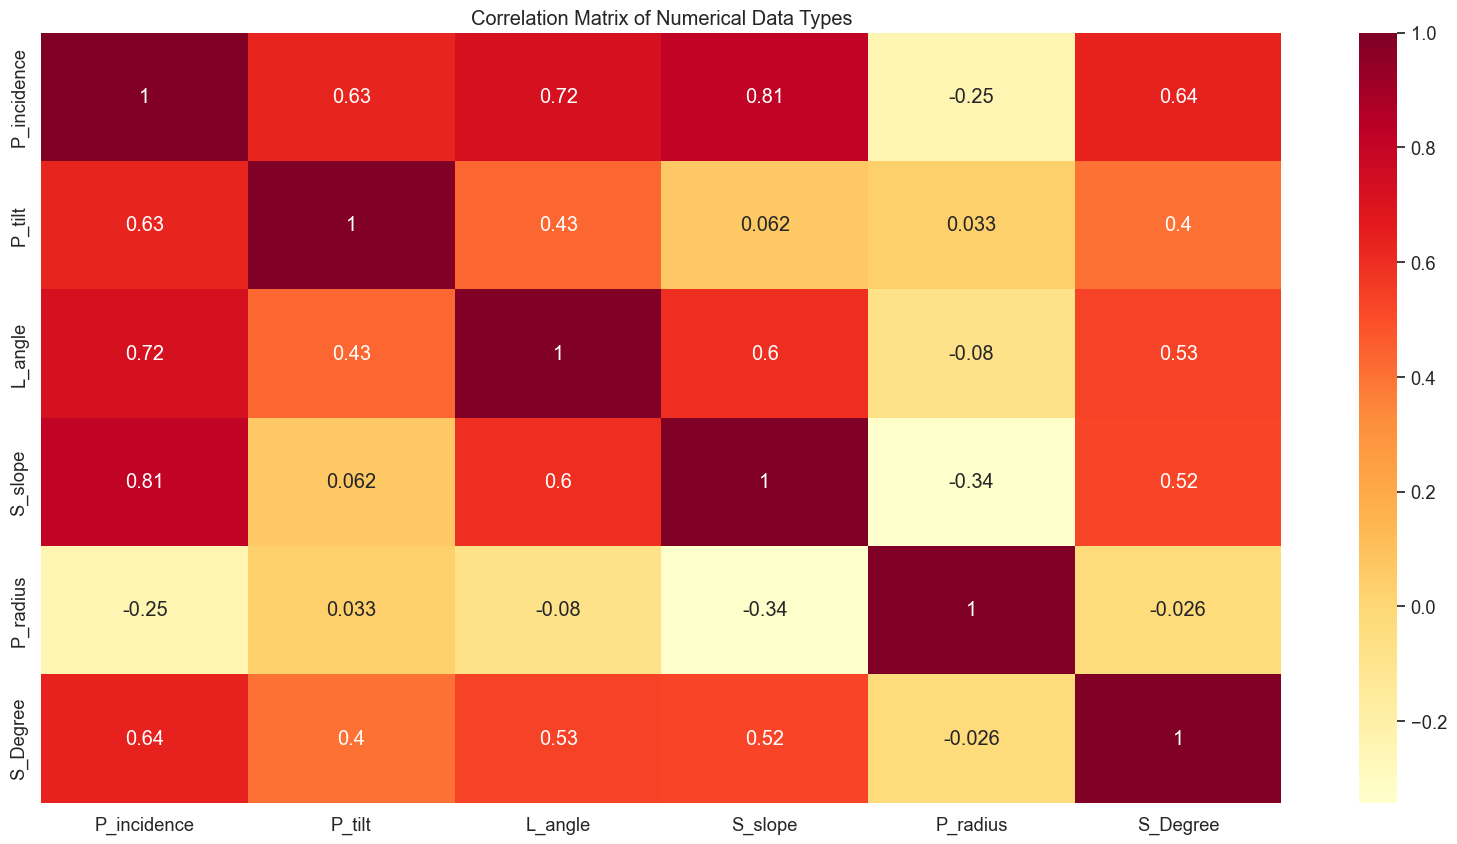

In [200]:
# visualize a heatmap to understand correlation between all features 

numerical_columns = df.select_dtypes(include=['float64'])
plt.figure(figsize = (20,10))
sns.heatmap(numerical_columns.corr(),annot=True , cmap ='YlOrRd' )
plt.title("Correlation Matrix of Numerical Data Types")

In [201]:
corr_matrix = numerical_columns.corr()

# Find pairs of columns with correlation coefficient close to 1 or -1

highly_correlated_pairs = []
less_correlated_pairs=[]

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if 0.7 <= abs(corr_matrix.iloc[i, j]) < 1:  # Exclude correlations of 1 and consider range from 0.7 to 1
            highly_correlated_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j]))
        else:
            less_correlated_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j]))

# Print the highly correlated column pairs along with their correlation coefficients

print("Highly correlated column pairs:")
for pair in highly_correlated_pairs:
    col1, col2 = pair
    correlation_coefficient = corr_matrix.loc[col1, col2]
    print(f"{col1} - {col2}: {correlation_coefficient}")
    
print("-"*50)

# Print the less correlated column pairs along with their correlation coefficients

print("Less correlated column pairs:")
for pair in less_correlated_pairs:
    col1, col2 = pair
    correlation_coefficient = corr_matrix.loc[col1, col2]
    print(f"{col1} - {col2}: {correlation_coefficient}")

Highly correlated column pairs:
P_incidence - L_angle: 0.717282364274049
P_incidence - S_slope: 0.8149599891850364
--------------------------------------------------
Less correlated column pairs:
P_incidence - P_tilt: 0.6291987738605034
P_incidence - P_radius: -0.24746720592269325
P_incidence - S_Degree: 0.6387427486061593
P_tilt - L_angle: 0.43276386444815157
P_tilt - S_slope: 0.06234528977912984
P_tilt - P_radius: 0.03266781282852353
P_tilt - S_Degree: 0.3978622794847845
L_angle - S_slope: 0.5983868907766206
L_angle - P_radius: -0.08034360945420704
L_angle - S_Degree: 0.5336670125088709
S_slope - P_radius: -0.34212834910432627
S_slope - S_Degree: 0.5235574601349742
P_radius - S_Degree: -0.026065006625283552


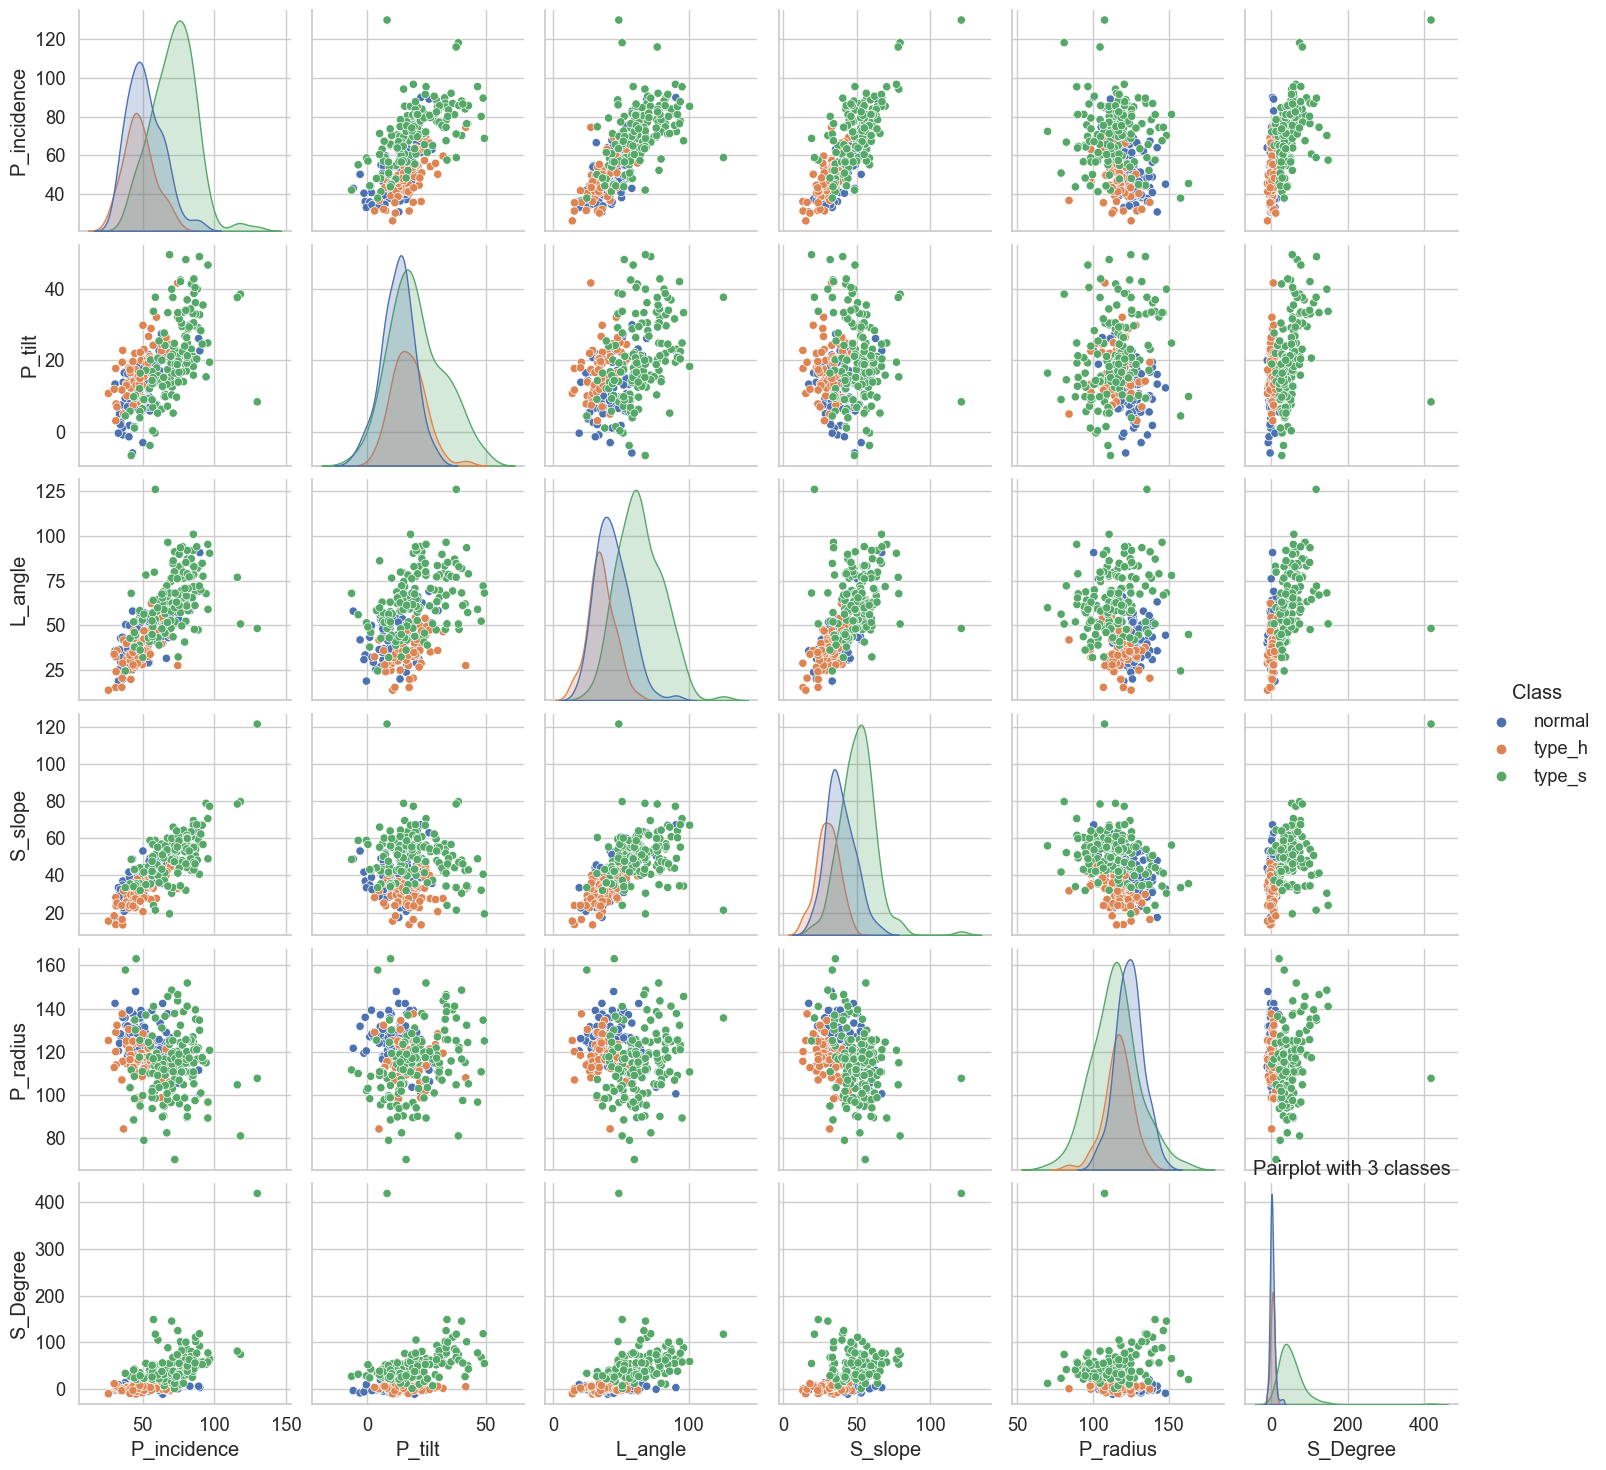

In [202]:
# Visualize a pairplot with 3 classes distinguished by colors

sns.pairplot(df, hue='Class')
plt.title('Pairplot with 3 classes')
plt.show()

Along the diagonal we can see distribution of variable for three claases are not same.We can prove that statistically as well

It is evident that type_s class is more compared to other two

Normal class has higher values compared to Type_H

<Figure size 1000x600 with 0 Axes>

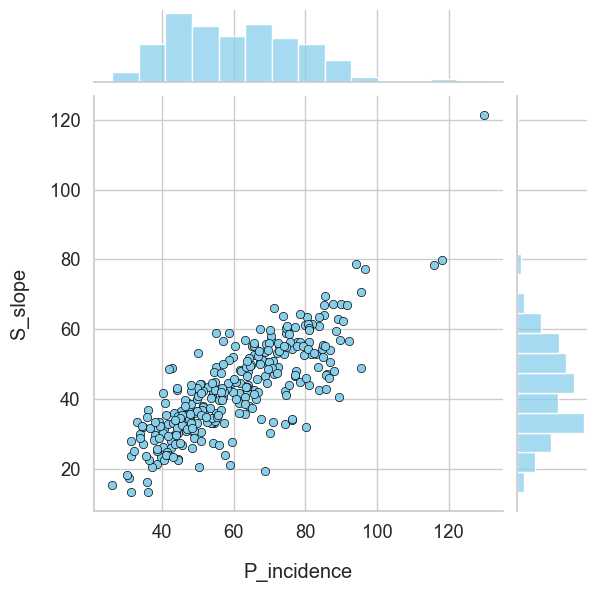

In [203]:
# Visualize a jointplot for 'P_incidence' and 'S_slope'

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.set_context("notebook", font_scale=1.2)
sns.jointplot(x='P_incidence', y='S_slope', data=df, kind='scatter', color='skyblue', marker='o', edgecolor='black')
plt.title('Jointplot for P_incidence and S_slope', pad=20)
plt.xlabel('P_incidence', labelpad=15)
plt.ylabel('S_slope', labelpad=15)
plt.show()

Here we can clearly observe that the scatter plot depicts S_slope and P_incidence are positively correlated. The histograms depicts that the S_slope is left skewed and P_incidence is right skewed.

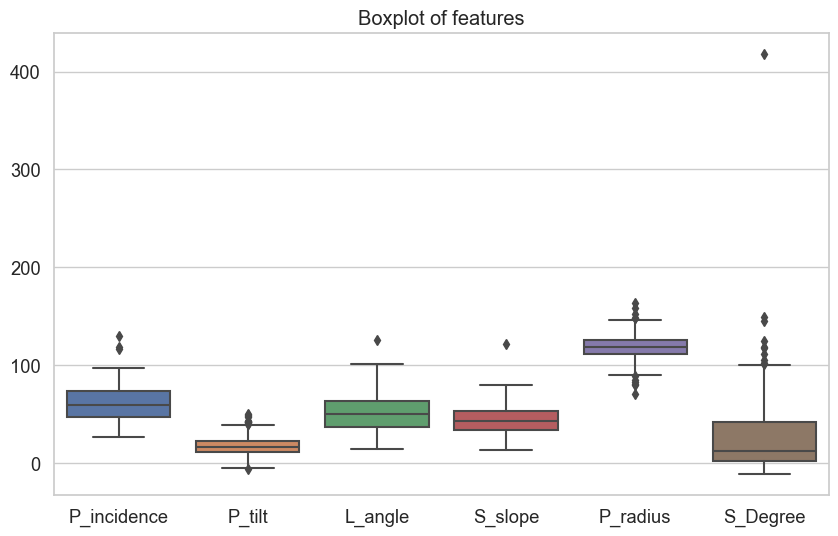

In [204]:
# Visualize a boxplot to check the distribution of the features

plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Boxplot of features')
plt.show()

In [205]:
# dealing with outliers

column=['P_incidence','P_tilt','L_angle','S_slope','P_radius','S_Degree']
for col in column:
    #getting upper-lower quartile values
    q25,q75=np.percentile(df[col],25),np.percentile(df[col],75)
    IQR=q75-q25
    Threshold=IQR*1.5
    lower,upper=q25-Threshold,q75+Threshold
    Outliers=[i for i in df[col] if i < lower or i > upper]
    print(' Total Number of outliers in {} Before Imputing : {}'.format(col,len(Outliers)))
    print('\n')
    #taking mean of a column without considering outliers
    df_include = df.loc[(df[col] >= lower) & (df[col] <= upper)]
    mean=int(df_include[col].mean())
    print('Mean of {} is {}'.format(col,mean))
    print('\n')
    #imputing outliers with mean
    df[col]=np.where(df[col]>upper,mean,df[col])
    df[col]=np.where(df[col]<lower,mean,df[col])
    Outliers=[i for i in df[col] if i < lower or i > upper]
    print('Total Number of outliers in {} After Imputing : {}'.format(col,len(Outliers)))  
    print('\n')

 Total Number of outliers in P_incidence Before Imputing : 3


Mean of P_incidence is 59


Total Number of outliers in P_incidence After Imputing : 0


 Total Number of outliers in P_tilt Before Imputing : 13


Mean of P_tilt is 16


Total Number of outliers in P_tilt After Imputing : 0


 Total Number of outliers in L_angle Before Imputing : 1


Mean of L_angle is 51


Total Number of outliers in L_angle After Imputing : 0


 Total Number of outliers in S_slope Before Imputing : 1


Mean of S_slope is 42


Total Number of outliers in S_slope After Imputing : 0


 Total Number of outliers in P_radius Before Imputing : 11


Mean of P_radius is 118


Total Number of outliers in P_radius After Imputing : 0


 Total Number of outliers in S_Degree Before Imputing : 10


Mean of S_Degree is 22


Total Number of outliers in S_Degree After Imputing : 0




In [206]:
# Encoding Class label

le=LabelEncoder()
df['Class']=le.fit_transform(df['Class'])
df['Class'].value_counts()

Class
2    150
0    100
1     60
Name: count, dtype: int64

normal: 0

type_h: 1

type_s: 2

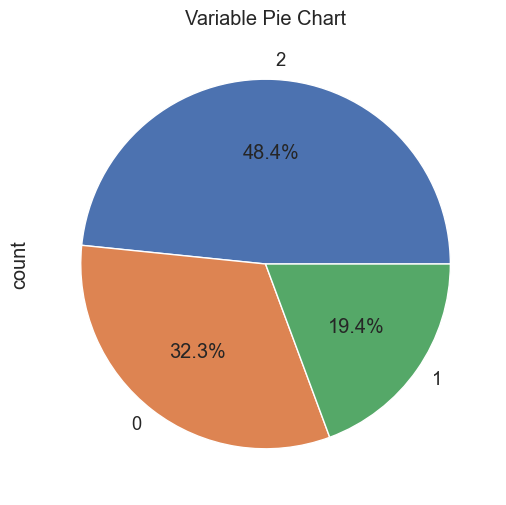

In [207]:
# checking target imbalance

plt.figure(figsize=(7, 6))
df['Class'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Variable Pie Chart')
plt.show()

We can see class imbalance here as 48% is observed for type_s and it can affect the performance of machine learning model


### Model Building

In [208]:
X = df.drop('Class', axis=1)  # Features
Y = df['Class']  # Target variable

In [209]:
# using z score to scale the features as we are not sure about the units of measurement

X_Scaled=X.apply(zscore)
X_Scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
P_incidence,310.0,1.375244e-16,1.001617,-2.094203,-0.835517,-0.074638,0.770733,2.281479
P_tilt,310.0,0.000000e+00,1.001617,-2.669021,-0.696391,-0.065374,0.533059,2.646095
L_angle,310.0,4.584147e-17,1.001617,-2.089008,-0.814203,-0.117915,0.624929,2.718904
S_slope,310.0,-9.168293e-17,1.001617,-2.321190,-0.739985,-0.027582,0.773799,2.927936
P_radius,310.0,-9.626708e-16,1.001617,-2.539211,-0.597449,-0.005408,0.630066,2.508397
S_Degree,310.0,4.584147e-17,1.001617,-1.320025,-0.817373,-0.413874,0.633223,3.100356


In [210]:
X_train, X_test, Y_train, Y_test = train_test_split(X_Scaled, Y, test_size=0.2, random_state=42)

In [211]:
# Create KNN classifier
knn_classifier =  KNeighborsClassifier() # default value is 5
# Train the classifier
knn_classifier.fit(X_train, Y_train)
test_predictions = knn_classifier.predict(X_test)

In [212]:
print('Accuracy on Training data:',knn_classifier.score(X_train, Y_train) )
print('Accuracy on Test data:',knn_classifier.score(X_test, Y_test) )

Accuracy on Training data: 0.8629032258064516
Accuracy on Test data: 0.8387096774193549


Accuracy of training data and testing data is almost same. So, there is no overfitting of data


In [213]:
confusion_matrix(Y_test,test_predictions)

array([[17,  4,  1],
       [ 2,  7,  1],
       [ 2,  0, 28]])

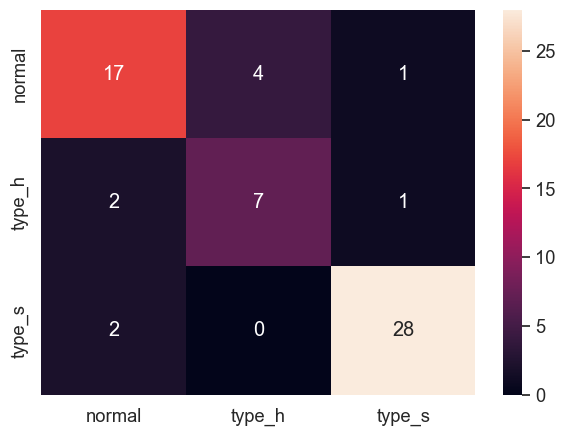

In [214]:
cm = confusion_matrix(Y_test, test_predictions, labels=[0, 1, 2])

df_cm = pd.DataFrame(cm, index = [i for i in ["normal","type_h","type_s"]],
                  columns = [i for i in ["normal","type_h","type_s"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

In [215]:

# Print classification report for test data
print("Classification Report for Test Data:")
print(classification_report(Y_test, test_predictions))

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.81      0.77      0.79        22
           1       0.64      0.70      0.67        10
           2       0.93      0.93      0.93        30

    accuracy                           0.84        62
   macro avg       0.79      0.80      0.80        62
weighted avg       0.84      0.84      0.84        62



Here , we can see the accuracy is 0.84 and weighted avg for precision and recall is 0.79 and 0.80 respectively (Since , we are dealing with imbalance class)

### Performance Improvement

In [216]:
# Finding the best value of k

train_score=[]
test_score=[]
for k in range(1,51):
    knn_classifier = KNeighborsClassifier(n_neighbors= k) 
    knn_classifier.fit(X_train, Y_train)
    train_score.append(knn_classifier.score(X_train, Y_train))
    test_score.append(knn_classifier.score(X_test, Y_test))

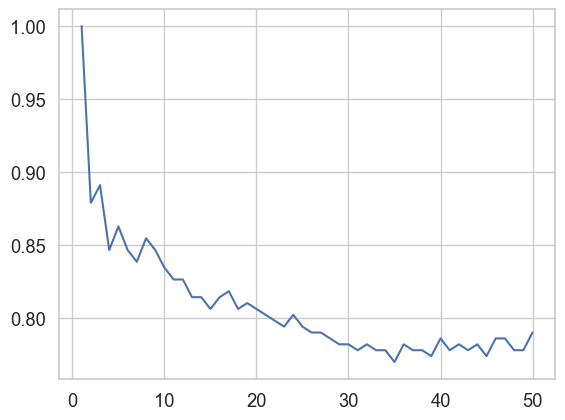

In [217]:
plt.plot(range(1,51),train_score)
plt.show()

The training accuracy decreases when value of k increases

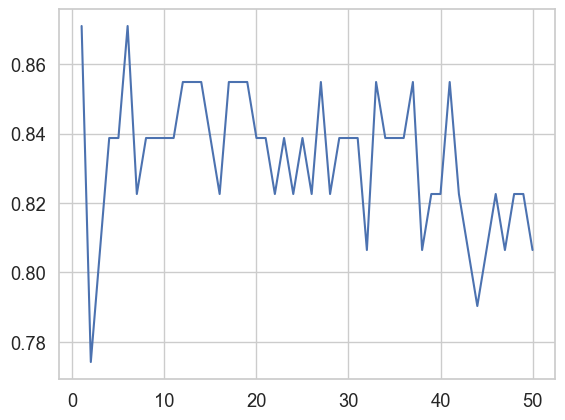

In [218]:
plt.plot(range(1,51),test_score)
plt.show()

The maximum accuracy occurs when the k value is below 10

In [219]:
k=[1,3,5,7,9]
for i in k:
    knn_classifier = KNeighborsClassifier(n_neighbors=i ) 
    knn_classifier.fit(X_train, Y_train)
    test_predictions = knn_classifier.predict(X_test)
    print('Accuracy on Training data for K: {} is {:.2f}'.format(i, knn_classifier.score(X_train, Y_train)))
    print('Accuracy on Test data for K: {} is {:.2f}'.format(i, knn_classifier.score(X_test, Y_test)))

    # Print classification report for test data
    print("Classification Report for Test Data:")
    print(classification_report(Y_test, test_predictions))

Accuracy on Training data for K: 1 is 1.00
Accuracy on Test data for K: 1 is 0.87
Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84        22
           1       0.70      0.70      0.70        10
           2       0.97      0.93      0.95        30

    accuracy                           0.87        62
   macro avg       0.83      0.83      0.83        62
weighted avg       0.87      0.87      0.87        62

Accuracy on Training data for K: 3 is 0.89
Accuracy on Test data for K: 3 is 0.81
Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.76      0.73      0.74        22
           1       0.54      0.70      0.61        10
           2       0.96      0.90      0.93        30

    accuracy                           0.81        62
   macro avg       0.75      0.78      0.76        62
weighted avg       0.82      0.81      0.81        62



Cross Validation

Cross-validation is a widely used technique to assess the performance of predictive models. It involves dividing the dataset into multiple subsets, known as folds. Each fold is alternately used as a validation set while the remaining folds are used for training the model. This process is repeated multiple times, with each fold serving as the validation set exactly once. The results from each fold are then combined to provide an overall estimate of the model's performance. The key advantage of cross-validation is that it ensures all data points are used for both training and validation, enhancing the robustness of the model evaluation.


Hyperparameter tuning is a crucial step in optimizing the performance of machine learning models. Instead of manually selecting hyperparameter values, a more systematic approach involves:

1. Experimenting with various hyperparameter values.

2. Training separate models with each set of hyperparameters.

3. Evaluating the performance of each model.

4. Selecting the best-performing model.

5. Employing cross-validation during this process to ensure reliable performance estimation.

Scikit-learn offers a convenient method for performing this process called GridSearchCV, which automates the search for the best hyperparameters through grid search cross-validation.






In [220]:
# hyperparameter tuning

param_grid = {
    'n_neighbors': range(1, 51),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
knn_classifier = KNeighborsClassifier()
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

# Best hyperparameters

best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Evaluate the model

best_knn_classifier = KNeighborsClassifier(**best_params)
best_knn_classifier.fit(X_train, Y_train)
test_predictions = best_knn_classifier.predict(X_test)
accuracy = best_knn_classifier.score(X_test, Y_test)
print("Accuracy on test set:", accuracy)

Best hyperparameters: {'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'distance'}
Accuracy on test set: 0.8548387096774194


In [221]:
# Print classification report for test data

print("Classification Report for Test Data:")
print(classification_report(Y_test, test_predictions))

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.78      0.82      0.80        22
           1       0.70      0.70      0.70        10
           2       0.97      0.93      0.95        30

    accuracy                           0.85        62
   macro avg       0.82      0.82      0.82        62
weighted avg       0.86      0.85      0.86        62



## Summarisation

here , previously we observed that for 5,9 we got the best accuracies but when we tuned again with different hyperparameters such as metrics , weights we found the best value of n is '8'.

The accuracy got improved to 85% from 84%(base model).

The precision got improved to 82% from 79%(base model).

The recall got improved to 82% from 80%(base model).



<h1><center><font size=8>PART B</center></font></h1>

### **Domain:**
Banking, Marketing
### **Context:**
A bank X is on a massive digital transformation for all its departments. Bank has a growing customer base where majority of them are 
liability customers (depositors) vs borrowers (asset customers). The bank is interested in expanding the borrowers base rapidly to bring in more 
business via loan interests. A campaign that the bank ran in last quarter showed an average single digit conversion rate. Digital transformation 
being the core strength of the business strategy, marketing department wants to devise effective campaigns with better target marketing to 
increase the conversion ratio to double digit with same budget as per last campaign.
### **Project Objective**
Build a Machine Learning model to perform focused marketing by predicting the potential customers who will convert 
using the historical dataset

### Data Understanding and Preparation

In [222]:
# loading the datasets Data1 and Data2 to two separate variables

data1 = pd.read_csv("Data1.csv")
data2 = pd.read_csv("Data2.csv")

In [223]:
data1.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2


In [224]:
data2.head()

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN


In [225]:
# displaying shape of the dataframes

print("The shape of Data 1 : ",data1.shape)
print("The shape of Data 2 : ",data2.shape)

The shape of Data 1 :  (5000, 8)
The shape of Data 2 :  (5000, 7)


In [226]:
# displaying the column names of each dataframes

print("The columns of Data 1 are : ",data1.columns)
print("The columns of Data 2 are : ",data2.columns)

The columns of Data 1 are :  Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level'],
      dtype='object')
The columns of Data 2 are :  Index(['ID', 'Mortgage', 'Security', 'FixedDepositAccount', 'InternetBanking',
       'CreditCard', 'LoanOnCard'],
      dtype='object')


In [227]:
# displaying the dataypes of dataframes

print("The datatypes of Data 1 are : \n",data1.dtypes)
print("The datatypes of Data 2 are : \n",data2.dtypes)

The datatypes of Data 1 are : 
 ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
dtype: object
The datatypes of Data 2 are : 
 ID                       int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object


In [228]:
# merging the dataframe based on the column ID

data = data1.merge(data2, on='ID', how='outer')

In [229]:
# converting ‘CreditCard’, ‘InternetBanking’, ‘FixedDepositAccount’, ‘Security’, ‘Level’, ‘HiddenScore’ to type Object

columns=['CreditCard','InternetBanking','FixedDepositAccount','Security','Level','HiddenScore']
data[columns] = data[columns].astype(object)   

In [230]:
# displaying the dataypes of dataframes after conversion

print("The datatypes of combined dataframe are : \n",data.dtypes)

The datatypes of combined dataframe are : 
 ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore             object
MonthlyAverageSpend    float64
Level                   object
Mortgage                 int64
Security                object
FixedDepositAccount     object
InternetBanking         object
CreditCard              object
LoanOnCard             float64
dtype: object


In [231]:
data.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


### Data Exploration and Analysis

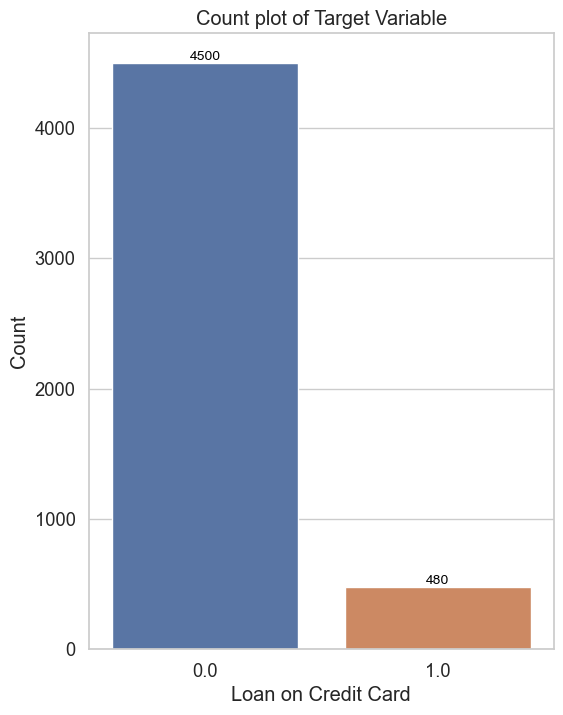

In [232]:
# Visualising distribution of Target variable ‘LoanOnCard'

plt.figure(figsize=(6,8))
ax = sns.countplot(x=data['LoanOnCard'])
ax.set(xlabel='Loan on Credit Card', ylabel='Count', title='Count plot of Target Variable')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height,
            format(height, '.0f'),
            ha='center', va='bottom', fontsize=10, color='black')
plt.show()

Here we can see People without Loan on credit card is significantly more , when compared to People with loan on credit card

In [233]:
# Check the percentage of missing values 

percent_missing = data.isnull().sum() * 100 / len(data)
print(percent_missing)

ID                     0.0
Age                    0.0
CustomerSince          0.0
HighestSpend           0.0
ZipCode                0.0
HiddenScore            0.0
MonthlyAverageSpend    0.0
Level                  0.0
Mortgage               0.0
Security               0.0
FixedDepositAccount    0.0
InternetBanking        0.0
CreditCard             0.0
LoanOnCard             0.4
dtype: float64


Here we can see the values are missing for column LoanOnCard


Here we know that, it has only values 0,1 and we will replace the missing values with the mode , i.e, 0 as we know 
Class 0 is more when compared to Class 1

In [234]:
# imputation of missing values

data['LoanOnCard'] = data['LoanOnCard'].fillna(data['LoanOnCard'].mode()[0])
data.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0.0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0.0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0.0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0.0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0.0


In [235]:
percent_missing = data.isnull().sum() * 100 / len(data)
print(percent_missing)

ID                     0.0
Age                    0.0
CustomerSince          0.0
HighestSpend           0.0
ZipCode                0.0
HiddenScore            0.0
MonthlyAverageSpend    0.0
Level                  0.0
Mortgage               0.0
Security               0.0
FixedDepositAccount    0.0
InternetBanking        0.0
CreditCard             0.0
LoanOnCard             0.0
dtype: float64


In [236]:
# checking for unexpected values in categorical data

unique_values = {}

for col in data.columns:
    if pd.api.types.is_categorical_dtype(data[col]) or pd.api.types.is_object_dtype(data[col]):
        unique_values[col] = data[col].unique()

for col, values in unique_values.items():
    print("Unique values in column '{}': {}".format(col, values))

Unique values in column 'HiddenScore': [4 3 1 2]
Unique values in column 'Level': [1 2 3]
Unique values in column 'Security': [1 0]
Unique values in column 'FixedDepositAccount': [0 1]
Unique values in column 'InternetBanking': [0 1]
Unique values in column 'CreditCard': [0 1]


We don't have any inconsistencies in our data

### Data Preparation and model building

In [237]:
# Split data into X and Y.

X = data.drop(labels=['ID', 'ZipCode', 'LoanOnCard'], axis=1)
Y = data['LoanOnCard']

In [238]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [239]:

model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

Classification Report for Test Data:
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      1116
         1.0       0.91      0.58      0.71       134

    accuracy                           0.95      1250
   macro avg       0.93      0.79      0.84      1250
weighted avg       0.95      0.95      0.94      1250

ROC AUC Score: 0.9623789653881132
Confusion Matrix:
[[1108    8]
 [  56   78]]
Log Loss: 0.1383747779224846


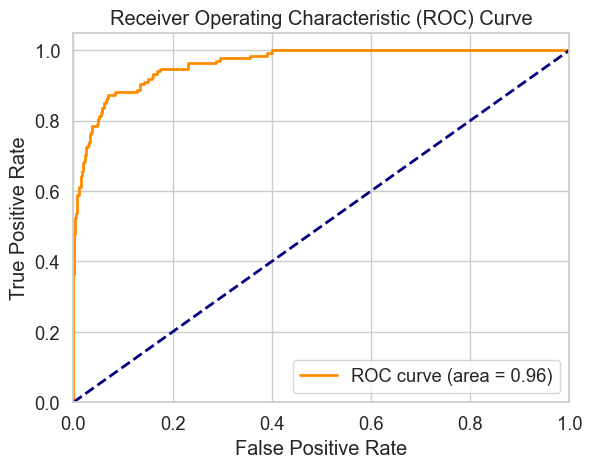

In [240]:
# Predicting on the test set

Y_pred = model.predict(X_test)
Y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability estimates of the positive class
roc_auc = roc_auc_score(Y_test, Y_pred_proba)
conf_matrix = confusion_matrix(Y_test, Y_pred)
logloss = log_loss(Y_test, Y_pred_proba)

# Printing the evaluation metrics

print("Classification Report for Test Data:")
print(classification_report(Y_test, Y_pred))
print("ROC AUC Score:", roc_auc)
print("Confusion Matrix:")
print(conf_matrix)
print("Log Loss:", logloss)

# Plotting ROC Curve

fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Here we can see the accuracy is 95% , but since the recall value suggests that our model is baised towards the majority class

In [241]:
# check distribution of target variable

percent_dist = (data.LoanOnCard.value_counts()/data.LoanOnCard.value_counts().sum())*100
percent_dist

LoanOnCard
0.0    90.4
1.0     9.6
Name: count, dtype: float64

Here we can see 90% of the data belong to Class 0. So, we need to use appropriate sampling techniques to balance the target variable

In [242]:
# Using smote to resample the training data

smote = SMOTE(random_state=42)
X_train_res, Y_train_res = smote.fit_resample(X_train, Y_train)

In [243]:
Y_train_res.value_counts()

LoanOnCard
0.0    3404
1.0    3404
Name: count, dtype: int64

In [244]:
model = LogisticRegression()
model.fit(X_train_res, Y_train_res)

LogisticRegression()

Classification Report for Test Data:
              precision    recall  f1-score   support

         0.0       0.99      0.89      0.94      1116
         1.0       0.49      0.90      0.64       134

    accuracy                           0.89      1250
   macro avg       0.74      0.90      0.79      1250
weighted avg       0.93      0.89      0.90      1250

ROC AUC Score: 0.964665917723212
Confusion Matrix:
[[992 124]
 [ 13 121]]
Log Loss: 0.26071000859008037


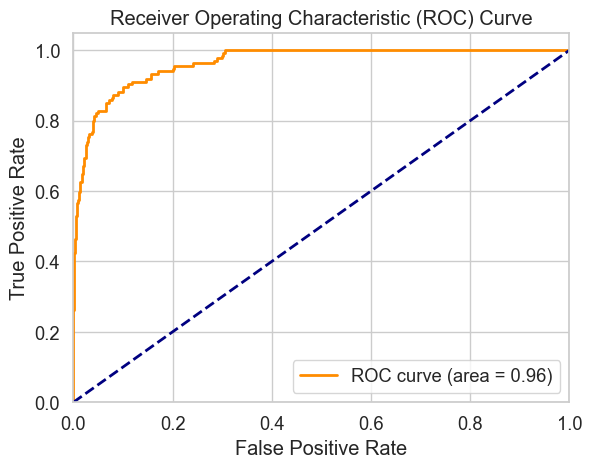

In [245]:
# Predicting on the test set

Y_pred = model.predict(X_test)
Y_pred_proba = model.predict_proba(X_test)[:, 1]  
roc_auc = roc_auc_score(Y_test, Y_pred_proba)
conf_matrix = confusion_matrix(Y_test, Y_pred)
logloss = log_loss(Y_test, Y_pred_proba)

# Printing the evaluation metrics

print("Classification Report for Test Data:")
print(classification_report(Y_test, Y_pred))
print("ROC AUC Score:", roc_auc)
print("Confusion Matrix:")
print(conf_matrix)
print("Log Loss:", logloss)

# Plotting ROC Curve

fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

here we can see the accuracy of the model dropped to 90% , we can see the recall value increased to 90%. That means our model treats equally the class 1 as well.

### Performance Improvement

In [246]:
# SVM base model

svm_base_model = SVC()
svm_base_model.fit(X_train_res, Y_train_res)

SVC()

In [247]:
test_predictions = svm_base_model.predict(X_test)
print("Accuracy of the test data for svm base model : ",svm_base_model.score(X_test,Y_test))

Accuracy of the test data for svm base model :  0.8416


In [248]:
# Printing the evaluation metrics
print("Classification Report for Test Data:")
print(classification_report(Y_test, test_predictions))

Classification Report for Test Data:
              precision    recall  f1-score   support

         0.0       0.99      0.83      0.90      1116
         1.0       0.40      0.93      0.56       134

    accuracy                           0.84      1250
   macro avg       0.69      0.88      0.73      1250
weighted avg       0.93      0.84      0.87      1250



In [249]:
# KNN base model

knn_base_model = KNeighborsClassifier()
knn_base_model.fit(X_train_res, Y_train_res)

KNeighborsClassifier()

In [250]:
test_predictions = knn_base_model.predict(X_test)
print("Accuracy of the test data for Knn base model : ",knn_base_model.score(X_test,Y_test))

Accuracy of the test data for Knn base model :  0.8608


In [251]:
# Printing the evaluation metrics

print("Classification Report for Test Data:")
print(classification_report(Y_test, test_predictions))

Classification Report for Test Data:
              precision    recall  f1-score   support

         0.0       0.97      0.87      0.92      1116
         1.0       0.42      0.75      0.54       134

    accuracy                           0.86      1250
   macro avg       0.69      0.81      0.73      1250
weighted avg       0.91      0.86      0.88      1250



In [252]:
# hyperparameter tuning for SVM model

c=[0.001, 0.01, 0.1, 1]  # Range of C values
kernels=['linear','rbf','sigmoid','poly']  # Range of kernels
best_score = -1  # Initialize best score
best_params = {}  # Initialize best parameters

for kernel in kernels:
    for c_value in c:
        svm_classifier = SVC(C=c_value, kernel=kernel)
        svm_classifier.fit(X_train_res, Y_train_res)
        score = svm_classifier.score(X_test, Y_test)
        print(f'C={c_value:.2f}, Kernel={kernel}, Score={score:.4f}')
        
        if score > best_score:
            best_score = score
            best_params = {'C': c_value, 'kernel': kernel}

print("\nBest parameters:", best_params)
print("Best Accuracy:", best_score)    

C=0.00, Kernel=linear, Score=0.8760
C=0.01, Kernel=linear, Score=0.8864
C=0.10, Kernel=linear, Score=0.8944
C=1.00, Kernel=linear, Score=0.8920
C=0.00, Kernel=rbf, Score=0.8112
C=0.01, Kernel=rbf, Score=0.8328
C=0.10, Kernel=rbf, Score=0.8368
C=1.00, Kernel=rbf, Score=0.8416
C=0.00, Kernel=sigmoid, Score=0.6696
C=0.01, Kernel=sigmoid, Score=0.6352
C=0.10, Kernel=sigmoid, Score=0.6424
C=1.00, Kernel=sigmoid, Score=0.6416
C=0.00, Kernel=poly, Score=0.8880
C=0.01, Kernel=poly, Score=0.8816
C=0.10, Kernel=poly, Score=0.8704
C=1.00, Kernel=poly, Score=0.8752

Best parameters: {'C': 0.1, 'kernel': 'linear'}
Best Accuracy: 0.8944


In [253]:
# Classification result for the best SVM model

test_predictions = svm_base_model.predict(X_test)
svm_best_model = SVC(C=0.10,kernel='linear')
svm_best_model.fit(X_train_res, Y_train_res)
test_predictions = svm_best_model.predict(X_test)
print("Classification Report for Test Data:")
print(classification_report(Y_test, test_predictions))

Classification Report for Test Data:
              precision    recall  f1-score   support

         0.0       0.99      0.89      0.94      1116
         1.0       0.50      0.90      0.65       134

    accuracy                           0.89      1250
   macro avg       0.75      0.90      0.79      1250
weighted avg       0.94      0.89      0.91      1250



In [254]:
# hyperparamter tuning for KNN Classifier model

param_grid = {
    'n_neighbors': range(1, 30),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
knn_classifier = KNeighborsClassifier()
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_res, Y_train_res)

# Best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Evaluate the model
best_knn_classifier = KNeighborsClassifier(**best_params)
best_knn_classifier.fit(X_train_res, Y_train_res)
test_predictions = best_knn_classifier.predict(X_test)
accuracy = best_knn_classifier.score(X_test, Y_test)
print("Accuracy on test set:", accuracy)

Best hyperparameters: {'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'distance'}
Accuracy on test set: 0.8984


In [255]:
# Classification report for best KNN model

print("Classification Report for Test Data:")
print(classification_report(Y_test, test_predictions))

Classification Report for Test Data:
              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94      1116
         1.0       0.52      0.60      0.56       134

    accuracy                           0.90      1250
   macro avg       0.74      0.77      0.75      1250
weighted avg       0.91      0.90      0.90      1250



Based on the provided classification reports for SVM and KNN models, let's consider which model might be more suitable for the bank's marketing campaign objective:

SVM Model:

The SVM model has a slightly lower overall accuracy compared to the KNN model (0.89 vs. 0.90).
However, SVM achieves higher precision for the majority class (0.99 for class 0) compared to k-NN (0.95 for class 0).
SVM also has a higher F1-score for the minority class (0.65 for class 1) compared to KNN (0.56 for class 1).
SVM has a higher recall for the majority class (0.89 for class 0) compared to KNN (0.93 for class 0).
KNN Model:

The KNN model achieves slightly higher accuracy (0.90) compared to SVM (0.89).
KNN has a higher recall for the majority class (0.93 for class 0) compared to SVM (0.89 for class 0).
However, KNN has lower precision for the majority class (0.95 for class 0) compared to SVM (0.99 for class 0).
KNN has a lower F1-score for the minority class (0.56 for class 1) compared to SVM (0.65 for class 1).
Considering the bank's objective to increase the conversion ratio to double digits with the same budget as the last campaign, a key consideration would be maximizing the precision for identifying potential borrowers (asset customers) to ensure efficient allocation of resources and marketing budget.

Given that SVM achieves higher precision for the majority class (depositors) and a higher F1-score for the minority class (borrowers) compared to KNN, SVM might be more suitable for this scenario. Additionally, SVM's higher recall for the majority class could also help capture more potential borrowers without significantly compromising precision.

Therefore, the bank may choose the SVM model for its marketing campaign to effectively target potential borrowers and increase the conversion ratio to double digits while maintaining the same budget as the previous campaign